In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Manytimes we are not able to capture distribution of data using a linear function. Incase we need to try some other algorithms. Now lets try to capture data distribution using a polynomial function.

Lets see polynomial regression model on a data having single feature first.
## Univariate polynomial regression

In [2]:
data= pd.read_csv('data/data.csv', header= None)
data.head()

,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
x= data[0].values.reshape(-1,1)
y= data[1].values.reshape(1,-1)

If we are directly using polynomial regression on the data; then by increasing the degree of features, features might blow up and its magnitude may become very large.

To address this we can scale (normalize) the data.  Although there are several ways of normalizing the data, we will use a method for which we subtract the mean and divide by the standard deviation, as presented below:
![](images/img5.png)

In [4]:
x= (x-np.mean(x))/np.std(x)

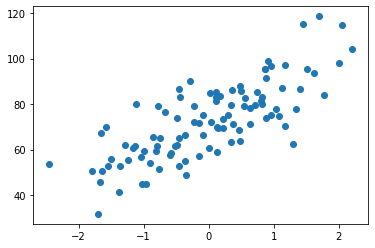

In [5]:
plt.scatter(x,y)

# Polynomial regression using NumPy

In [6]:
## generating a new matrix after polynomial transformation
degree= 3
arr= x.copy()
for i in range(2, degree+1):
    arr= np.concatenate([arr, x**i], axis= 1)
X= np.concatenate([np.ones((x.shape[0], 1)), arr], axis= 1)
X.shape

(100, 4)

In [7]:
'''
y= b + w1*x + w2*x2 + w3*x3
here,
x2= x**2
x3= x**3

or
y= w*X.T
'''

w= np.random.rand(1,X.shape[1])

In [8]:
w.shape, X.shape, y.shape
# Once we got the required matrix, then we need to simply apply linear regression on newly generated matrix

((1, 4), (100, 4), (1, 100))

In [9]:
# training model just as we did in Linear regression
alpha= 0.01
num_iterations= 100
m= X.shape[0]

cost= []
for i in range(num_iterations):
    y_pred= np.dot(w, X.T)
    error= np.mean((y-y_pred)**2)
    grad= (-2/m)*np.dot(y-y_pred, X)
    w= w- alpha*grad
    cost.append(error)

In [10]:
y_pred= np.dot(w, X.T)
y_pred

array([[ 64.67777441,  55.85427965,  83.71020536,  49.54617537,
         75.6251785 ,  59.69401344,  53.72265929,  54.20828367,
         49.75547856,  54.26891166,  49.51021771,  57.79988903,
         49.93649066,  69.04487659,  64.16308446,  50.19695961,
         49.72017099,  77.77589344,  49.47258047,  54.81819713,
        112.47859508, 106.96934825,  49.54760237,  51.74575044,
         53.17062105,  73.74609973,  66.04064853,  95.30137575,
         49.42237096,  51.55091012,  53.74174202,  59.54448089,
         51.01568685,  69.03046207,  66.69597491,  49.50588779,
         85.60011229,  63.65660959,  58.18991419,  56.36439549,
         49.76948341,  50.39732049,  51.06727641,  50.08114101,
         91.65582252,  64.38899094,  53.18552681,  56.14703229,
         62.34427401, 102.18578342,  55.74601307,  49.79034926,
         52.71286806,  51.61440248,  52.16017566,  59.53233401,
         51.93027385,  88.82200311,  50.36108169,  52.19663442,
         52.11863682,  51.17460817,  53.

In [11]:
error= np.mean((y-y_pred)**2)
error

396.8636770802597

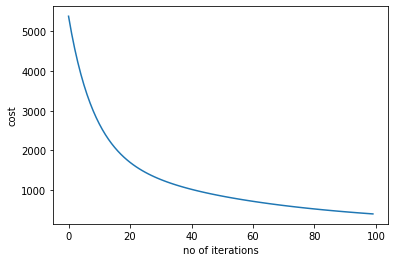

In [12]:
# lets plot cost vs no of iterations
plt.figure()
plt.plot(np.arange(len(cost)), cost)
plt.xlabel('no of iterations')
plt.ylabel('cost')
plt.show()

## Multivariate polynomial regression
Suppose we are given a dataset with 4 features (x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub>, x<sub>4</sub>) matrix and we want to apply polynomial regression of degree- 2. Then one way to do this problem is by using numpy and other way is to directly use sklearn library.

Using NumPy, simply we can calculate all possible combination of x<sub>i</sub>y<sub>j</sub> for all i,j pairs and append it to the matrix of independent variables.

or 

we can directly use sklearn library instead of NumPy for finding the required matrix

In [13]:
data= pd.read_csv('data/multi.csv')
data.head()

,feature1,feature2,feature3,feature4,y
0,6.697568,5.358884,6.079641,6.005001,3.750561
1,18.937950,21.079310,21.378936,21.347908,7.212618
2,0.461901,0.758917,2.486963,2.308012,1.442524
3,5.080914,3.221526,5.206520,5.000960,1.442524
4,6.235667,7.867957,4.855840,5.167766,2.019533


In [14]:
X= data[['feature1', 'feature2', 'feature3', 'feature4']].values
y= data['y'].values
y= y.reshape(-1,1)
X.shape, y.shape

((241978, 4), (241978, 1))

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(2)
X= poly.fit_transform(X)
X.shape

(241978, 15)

In [16]:
# lets see how our new matrix looks like
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.0,6.697568,5.358884,6.079641,6.005001,44.857415,35.891490,40.718805,40.218903,28.717639,32.580089,32.180106,36.962029,36.508249,36.060040
1,1.0,18.937950,21.079310,21.378936,21.347908,358.645969,399.198934,404.873234,404.285621,444.337320,450.653227,449.999172,457.058910,456.395557,455.733167
2,1.0,0.461901,0.758917,2.486963,2.308012,0.213353,0.350545,1.148731,1.066074,0.575955,1.887399,1.751590,6.184985,5.739940,5.326919
3,1.0,5.080914,3.221526,5.206520,5.000960,25.815682,16.368294,26.453877,25.409445,10.378228,16.772937,16.110721,27.107848,26.037596,25.009600
4,1.0,6.235667,7.867957,4.855840,5.167766,38.883538,49.061957,30.279400,32.224463,61.904749,38.205541,40.659757,23.579182,25.093843,26.705800


In [17]:
# Now it has become the problem of multivariate linear regression
# lets again use sklearn library for fitting linear regression model
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred= lr.predict(X)
y_pred

array([[4.43563725],
       [8.03923327],
       [0.98489164],
       ...,
       [0.72848347],
       [0.7781869 ],
       [0.42623368]])

## End Notes
Now how to decide the degree for the applying polynomial regression. Consider degree to be a hyperparameter and try out differnt values to find the best model.
But if we are taking a polynomial with very high degree, then there are more chances that model will overfit to data. Lets see the meaning of Overfitting and Underfitting in next notebook.